## A) Create MySQL DataBase

In [1]:
import mysql.connector as mysql

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

mydb = mysql.connect(user=user, password=pw, host=host)

mycursor = mydb.cursor()

try:
    print("Execute MySQL to create DataBase!")
    mycursor.execute("CREATE DATABASE moh_diseases")
    mydb.commit()
    print("DATABASE CREATED!")
except:
    print("Unexpected Error!")
    exit()
finally:
    mycursor.close()
    mydb.close()

Execute MySQL to create DataBase!
DATABASE CREATED!


## B) Create Table in MySQL DataBase

In [2]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_diseases'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

create_table = ("CREATE TABLE diseases(year VARCHAR(50), disease VARCHAR(100), prevalence_rate INT(20))")

try:
    print("Executing MySQL to CREATE TABLE!")
    cursor.execute(create_table)
    mycursor.commit()
    print("Table Created!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Executing MySQL to CREATE TABLE!
Table Created!


## C) Insert Data into MySQL DataBase

In [3]:
import mysql.connector as mysql
import pandas as pd

filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\Prevalence_Health.csv'

df = pd.read_csv(filename)

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_diseases'
mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

for index, col in df.iterrows():
    data = {'year': col[0],
           'disease': col[1],
           'prevalence_rate':col[2]}

    sql = ("INSERT INTO diseases(year, disease, prevalence_rate)"
          "VALUES(%(year)s, %(disease)s, %(prevalence_rate)s)")

    cursor.execute(sql, data)
    print("Adding row" + str(index))
    mycursor.commit()

print("All data are inserted into DataBase!")

cursor.close()
mycursor.close()

Adding row0
Adding row1
Adding row2
Adding row3
Adding row4
Adding row5
Adding row6
Adding row7
Adding row8
Adding row9
Adding row10
Adding row11
Adding row12
Adding row13
Adding row14
Adding row15
Adding row16
Adding row17
Adding row18
Adding row19
All data are inserted into DataBase!


## D) Retrieve Data from MySQL DataBase

**** Welcome to MOH Health Diseases DataBases *****
1. Hypertension
2. Diabetes
3. High Total Cholesterol
4. Obesity
5. Daily Smoking
6. All of the above
-------------------------------------------------------------------
Enter your selection to view the health diseases database: 6

Data Info of Prevalence Diseases on Hypertension, Diabetes, High Total Cholesterol, Obesity & Daily Smoking: 
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
year               20 non-null object
disease            20 non-null object
prevalence_rate    20 non-null int64
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes
None


Data of Prevalence Diseases on Hypertension, Diabetes, High Total Cholesterol, Obesity & Daily Smoking: 
--------------------------------------------------------------------
    year                 disease  prevalence_rate
0   1992            Hypertension    

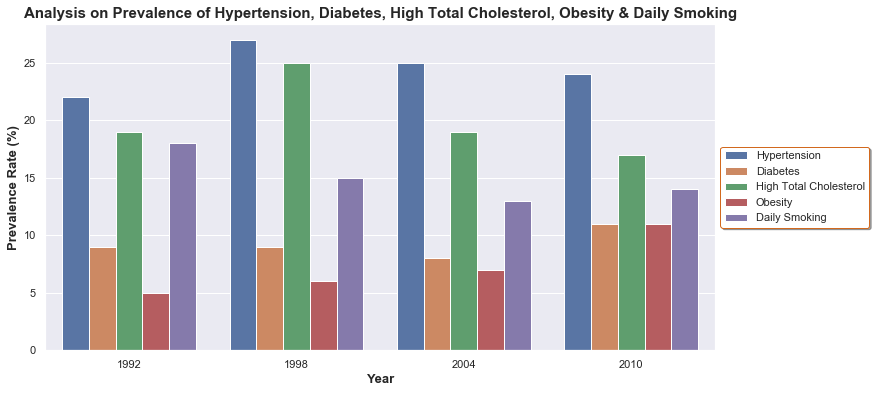

In [10]:
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

################################################ Define Functions ########################################################
def data_info(diseases, disease_df1):
    print()
    print("Data Info of Prevalence Diseases on " + diseases + ": ")
    print("--------------------------------------------------------------------")
    print(disease_df1.info())
    print()
    
def table_of_data(diseases, disease_df1):
    print()
    print("Data of Prevalence Diseases on " + diseases + ": ")
    print("--------------------------------------------------------------------")
    print(disease_df1)
    print()

def descriptive_stats_summary(diseases, disease_df1):
    
    print("Numerical Summary of Prevalence Diseases on " + diseases + ": ")
    print("---------------------------------------------------------------------")
    print(disease_df1['prevalence_rate'].describe())
    print()
    
def bar_chart(diseases, disease_df1):
    print("Graphical Summary of Prevalence Diseases on " + diseases + ": ")
    print("---------------------------------------------------------------------")
    sns.set(style = "darkgrid", rc = {'figure.figsize' : (12,6)})
    ax = sns.barplot(x = 'year', y = 'prevalence_rate', data = disease_df1,label = diseases)
    ax.set_title("Analysis on Prevalence of " + diseases, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Year", fontsize = 13, fontweight = 'bold')
    ax.set_ylabel("Prevalence Rate (%)", fontsize = 13, fontweight = 'bold')
    ax.legend(facecolor = 'white', edgecolor = 'navy', shadow = True)
    sns.despine(top  =True, right = True, left = False, bottom = False)
    
    plt.show(ax)

def grouped_bar_chart(diseases, disease_df1):
    print("Graphical Summary of Prevalence Diseases on " + diseases + ": ")
    print("---------------------------------------------------------------------")
    sns.set(style = "darkgrid", rc = {'figure.figsize': (12,6)})
    ax = sns.barplot(x = 'year', y = 'prevalence_rate', hue = 'disease', data = disease_df1)
    ax.set_title("Analysis on Prevalence of " + diseases, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Year", fontsize = 13, fontweight = 'bold')
    ax.set_ylabel("Prevalence Rate (%)", fontsize = 13, fontweight = 'bold')
    ax.legend(loc = 'center left', facecolor = 'white', edgecolor = 'chocolate', shadow = True, bbox_to_anchor=(1, 0.5))
    
    plt.show(ax)
############################################ Data Analysis ###############################################################
    
user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_diseases'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)

print("**** Welcome to MOH Health Diseases DataBases *****")
print("==================================================================")
print("1. Hypertension")
print("2. Diabetes")
print("3. High Total Cholesterol")
print("4. Obesity")
print("5. Daily Smoking")
print("6. All of the above")
print("-------------------------------------------------------------------")
choice = int(input("Enter your selection to view the health diseases database: "))

if choice == 1:
    diseases = "Hypertension"
    sql = "SELECT * FROM diseases WHERE disease = '" + diseases + "' "
    
    disease_df = pd.read_sql(sql, con = mycursor)
    disease_df1 = pd.DataFrame(disease_df)
    
    ### call the function to display the data info
    data_info(diseases, disease_df1)
    
    ### call the function to display the table of data
    table_of_data(diseases, disease_df1)
    
    ### call the function to display basic descriptive statistics
    descriptive_stats_summary(diseases, disease_df1)
    
    ### call the function to display the bar chart
    bar_chart(diseases, disease_df1)
    
elif choice == 2:
    diseases = "Diabetes"
    sql = "SELECT * FROM diseases WHERE disease = '" + diseases + "'"
    disease_df = pd.read_sql(sql, con = mycursor)
    disease_df1 = pd.DataFrame(disease_df)
    
    ### call the function to display the data info
    data_info(diseases, disease_df1)
    
    ### call the function to display the table of data
    table_of_data(diseases, disease_df1)
    
    ### call the function to display basic descriptive statistics
    descriptive_stats_summary(diseases, disease_df1)
    
    ### call the function to display the bar chart
    bar_chart(diseases, disease_df1)
    
elif choice == 3:
    diseases = "High Total Cholesterol"
    sql = "SELECT * FROM diseases WHERE disease = '" + diseases + "'"
    disease_df = pd.read_sql(sql, con = mycursor)
    disease_df1 = pd.DataFrame(disease_df)
    
    ### call the function to display the data info
    data_info(diseases, disease_df1)
    
    ### call the function to display the table of data
    table_of_data(diseases, disease_df1)
    
    ### call the function to display basic descriptive statistics
    descriptive_stats_summary(diseases, disease_df1)
    
    ### call the function to display the bar chart
    bar_chart(diseases, disease_df1)
    
elif choice == 4:
    diseases = "Obesity"
    sql = "SELECT * FROM diseases WHERE disease = '" + diseases + "'"
    disease_df = pd.read_sql(sql, con = mycursor)
    disease_df1 = pd.DataFrame(disease_df)
    
    ### call the function to display the data info
    data_info(diseases, disease_df1)
    
    ### call the function to display the table of data
    table_of_data(diseases, disease_df1)
    
    ### call the function to display basic descriptive statistics
    descriptive_stats_summary(diseases, disease_df1)
    
    ### call the function to display the bar chart
    bar_chart(diseases, disease_df1)
    
elif choice == 5:
    diseases = "Daily Smoking"
    sql = "SELECT * FROM diseases WHERE disease = '" + diseases + "'"
    disease_df = pd.read_sql(sql, con = mycursor)
    disease_df1 = pd.DataFrame(disease_df)
    
    ### call the function to display the data info
    data_info(diseases, disease_df1)
    
    ### call the function to display the table of data
    table_of_data(diseases, disease_df1)
    
    ### call the function to display basic descriptive statistics
    descriptive_stats_summary(diseases, disease_df1)
    
    ### call the function to display the bar chart
    bar_chart(diseases, disease_df1)

    
elif choice == 6:
    diseases = "Hypertension, Diabetes, High Total Cholesterol, Obesity & Daily Smoking"
    sql = "SELECT * FROM diseases"
    disease_df = pd.read_sql(sql, con = mycursor)
    disease_df1 = pd.DataFrame(disease_df)
    
    ### call the function to display the data info
    data_info(diseases, disease_df1)
    
    ### call the function to display the table of data
    table_of_data(diseases, disease_df1)
    
    ### call the function to display the bar chart
    grouped_bar_chart(diseases, disease_df1)
    
mycursor.close()
    

## E) Delete Table in MySQL DataBase

In [11]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_diseases'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

mysql = ("DROP TABLE diseases")

try:
    print("Execute MySQL to delete table!")
    cursor.execute(mysql)
    mycursor.commit()
    print("Table Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to delete table!
Table Deleted!


## F) Delete MySQL DataBase

In [12]:
import mysql.connector, sys

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

mycursor = mysql.connector.connect(user=user, password = pw, host=host)
cursor = mycursor.cursor()

mysql = ("DROP DATABASE moh_diseases")

try:
    print("Execute MySQL to delete database")
    cursor.execute(mysql)
    mycursor.commit()
    print("DataBase Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to delete database
DataBase Deleted!
